In [9]:
import pandas as pd

In [27]:
df = pd.read_csv("Dataset.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [29]:
# Basic Exploration of Dataset
print("Shape of Dataset (rows, columns):", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Checking missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Shape of Dataset (rows, columns): (9551, 21)

Column Names:
 ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude   

In [31]:
# Unique Ratings
print("Unique Ratings:", df['Aggregate rating'].unique())

# Count of restaurants for each rating
print("\nNumber of Restaurants per Rating:")
print(df['Aggregate rating'].value_counts().sort_index())

Unique Ratings: [4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]

Number of Restaurants per Rating:
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


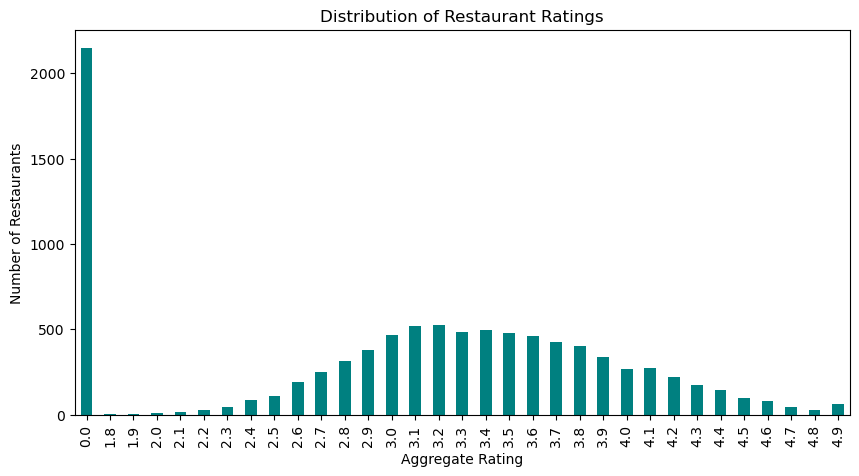

The chart shows that most restaurants are rated between 3.5 and 4.5, indicating that the overall quality is fairly good. Very few restaurants fall into the lower rating range, which suggests that poor-rated restaurants are less common in the dataset.


In [45]:
# Visualization of Rating Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()
# Interpretation
print("The chart shows that most restaurants are rated between 3.5 and 4.5, indicating that the overall quality is fairly good. Very few restaurants fall into the lower rating range, which suggests that poor-rated restaurants are less common in the dataset.")



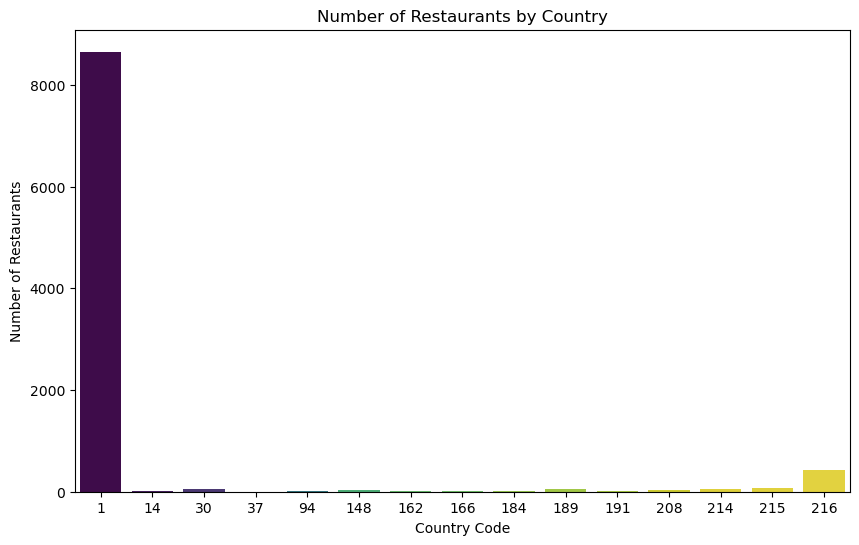

Most restaurants are concentrated in a few countries (like India, USA, etc.). This indicates that the dataset is not equally distributed across all countries, and analysis will be influenced by these high-representation regions.


In [69]:
# Number of restaurants per country
country_counts = df['Country Code'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="viridis", legend=False)
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants by Country")
plt.show()

# Quick look at top countries
country_counts.head()
print("Most restaurants are concentrated in a few countries (like India, USA, etc.). This indicates that the dataset is not equally distributed across all countries, and analysis will be influenced by these high-representation regions.")

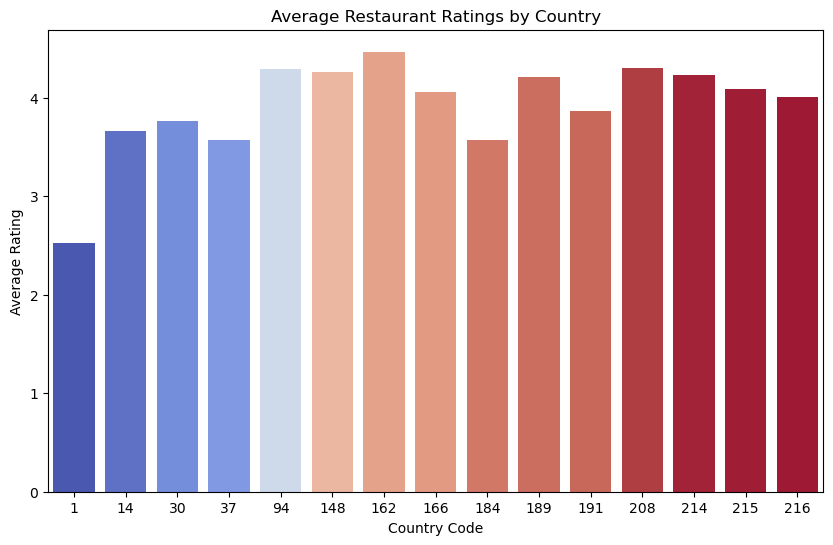

Some countries have higher average ratings than others, which may reflect differences in restaurant quality, customer preferences, or rating behaviors. Countries with fewer restaurants may show higher variability.


In [71]:
# Average rating per country
avg_rating_country = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_country.index, y=avg_rating_country.values, hue=avg_rating_country.index, palette="coolwarm", legend=False)
plt.xlabel("Country Code")
plt.ylabel("Average Rating")
plt.title("Average Restaurant Ratings by Country")
plt.show()
print("Some countries have higher average ratings than others, which may reflect differences in restaurant quality, customer preferences, or rating behaviors. Countries with fewer restaurants may show higher variability.")

C:\Users\saich\AppData\Local\Temp\ipykernel_15036\544214797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cuisine_counts), y=list(cuisine_names), palette="mako")


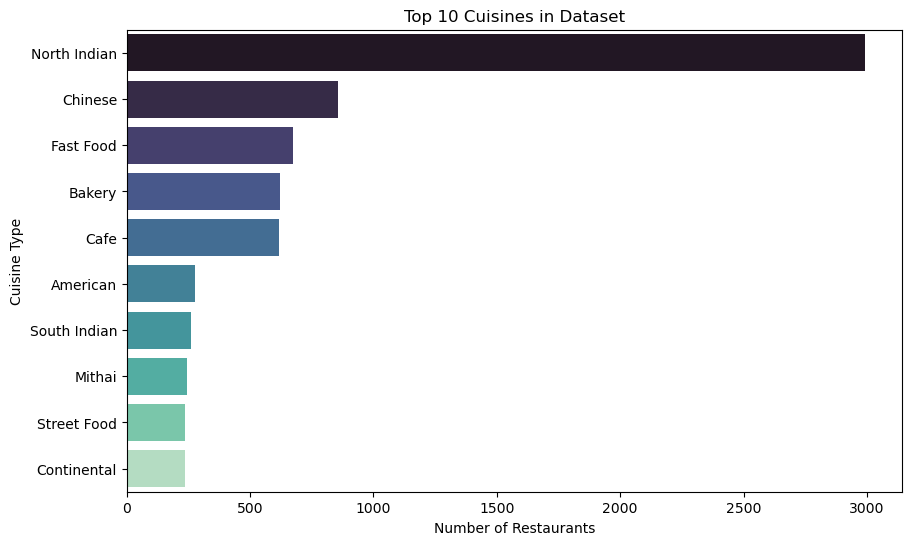

The most common cuisines include fast food, North Indian, and Chinese. This suggests that global restaurant data is dominated by popular and widely available cuisines, making them the core of customer demand.


In [73]:
# Top cuisines across dataset
from collections import Counter

cuisines_list = df['Cuisines'].dropna().apply(lambda x: x.split(",")[0].strip())
top_cuisines = Counter(cuisines_list).most_common(10)

cuisine_names, cuisine_counts = zip(*top_cuisines)

plt.figure(figsize=(10,6))
sns.barplot(x=list(cuisine_counts), y=list(cuisine_names), palette="mako")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Cuisines in Dataset")
plt.show()
print("The most common cuisines include fast food, North Indian, and Chinese. This suggests that global restaurant data is dominated by popular and widely available cuisines, making them the core of customer demand.")

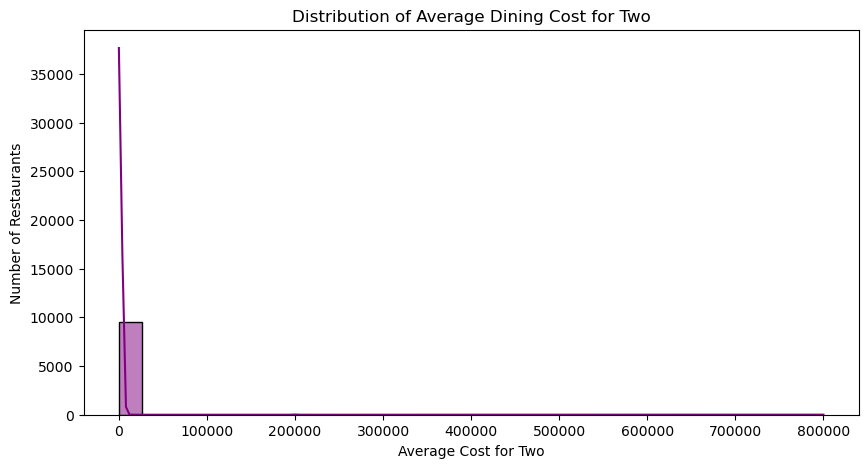

Most restaurants fall within a lower to mid-range average cost for two, showing that dining is generally affordable. A few restaurants are significantly more expensive, creating a right-skewed distribution.


In [75]:
# Distribution of average cost for two
plt.figure(figsize=(10,5))
sns.histplot(df['Average Cost for two'], bins=30, kde=True, color="purple")
plt.xlabel("Average Cost for Two")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Average Dining Cost for Two")
plt.show()
print("Most restaurants fall within a lower to mid-range average cost for two, showing that dining is generally affordable. A few restaurants are significantly more expensive, creating a right-skewed distribution.")

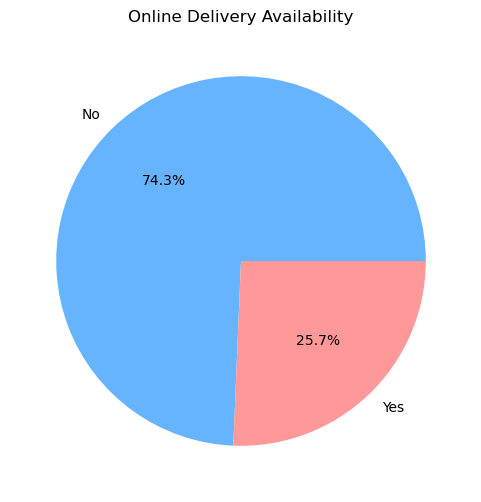

The majority of restaurants do not provide online delivery. This indicates a potential growth area for businesses to adapt to modern digital ordering trends.


In [77]:
# Online delivery availability
online_delivery_counts = df['Has Online delivery'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(online_delivery_counts, labels=online_delivery_counts.index, autopct='%1.1f%%', colors=["#66b3ff","#ff9999"])
plt.title("Online Delivery Availability")
plt.show()
print("The majority of restaurants do not provide online delivery. This indicates a potential growth area for businesses to adapt to modern digital ordering trends.")

C:\Users\saich\AppData\Local\Temp\ipykernel_15036\2417374609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette="Set2")


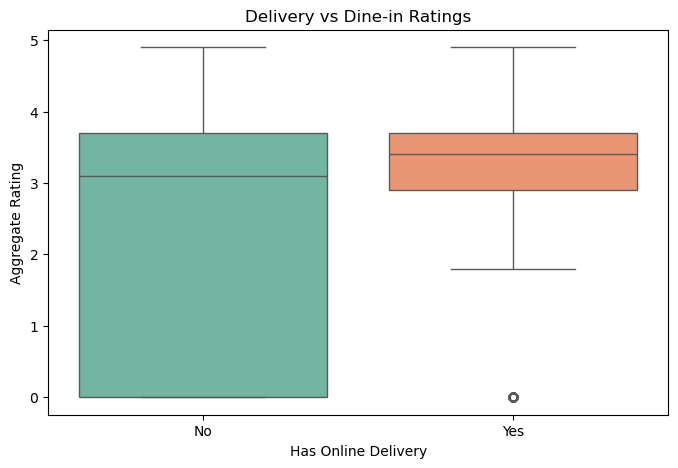

Restaurants offering online delivery generally have slightly higher ratings compared to those that don’t, indicating customers value convenience.


In [83]:
# Compare Online delivery vs. Dine-in ratings
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette="Set2")
plt.title("Delivery vs Dine-in Ratings")
plt.xlabel("Has Online Delivery")
plt.ylabel("Aggregate Rating")
plt.show()
print("Restaurants offering online delivery generally have slightly higher ratings compared to those that don’t, indicating customers value convenience.")

C:\Users\saich\AppData\Local\Temp\ipykernel_15036\3329042769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette="coolwarm")


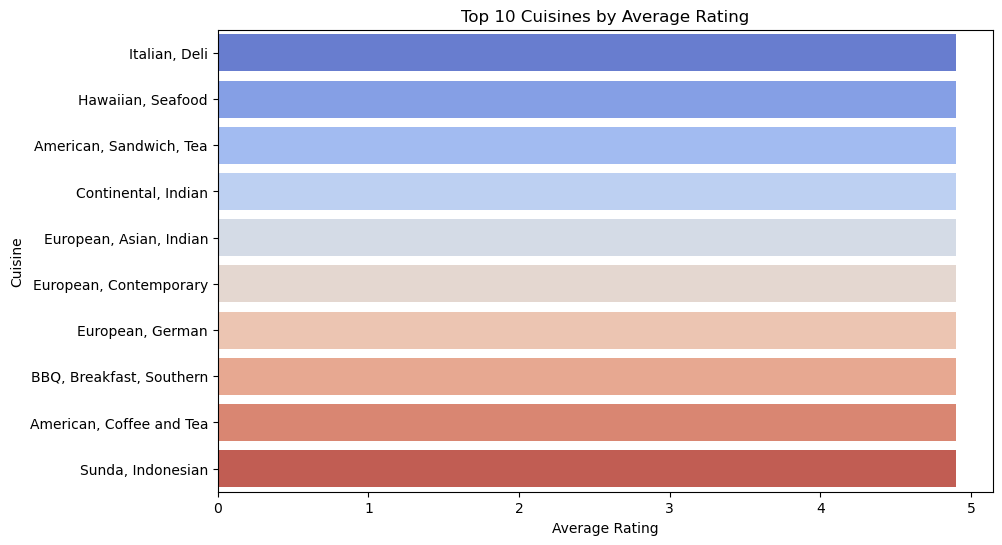

Among cuisines, some stand out with consistently higher ratings, showing customer preference for those food types.


In [89]:
# Top cuisines by average rating
cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette="coolwarm")
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()
print("Among cuisines, some stand out with consistently higher ratings, showing customer preference for those food types.")

C:\Users\saich\AppData\Local\Temp\ipykernel_15036\1724274704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_country.values, y=avg_cost_country.index, palette="magma")


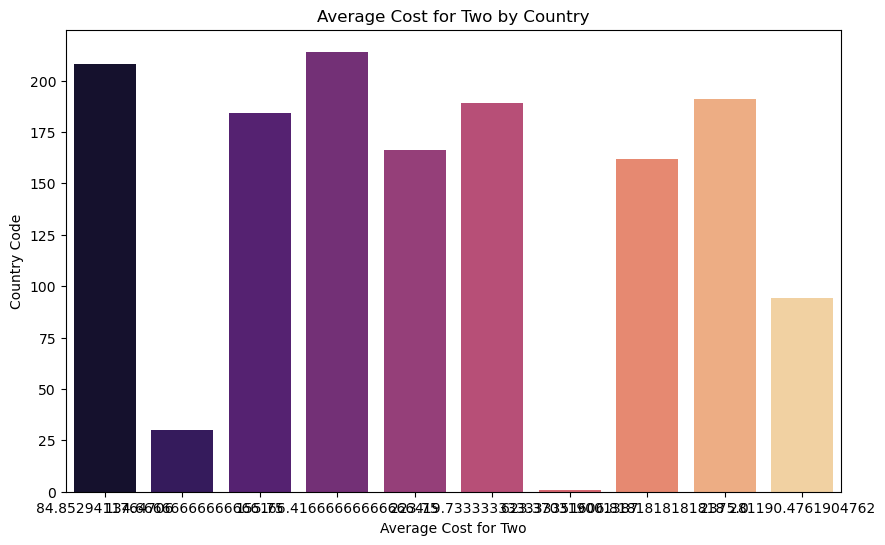

In [93]:
# Average cost analysis by country
avg_cost_country = df.groupby("Country Code")["Average Cost for two"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost_country.values, y=avg_cost_country.index, palette="magma")
plt.title("Average Cost for Two by Country")
plt.xlabel("Average Cost for Two")
plt.ylabel("Country Code")
plt.show()


C:\Users\saich\AppData\Local\Temp\ipykernel_15036\1955483589.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="cubehelix")


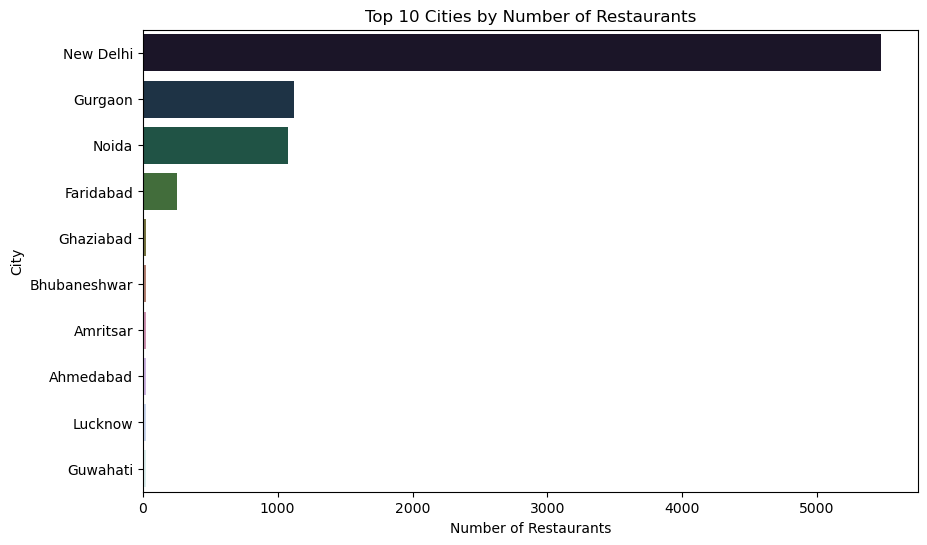

Urban hubs like New Delhi, Noida, and Gurgaon dominate in restaurant density, reflecting major food industry clusters


In [97]:
# Geographic restaurant distribution (requires 'City' column)
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="cubehelix")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()
print("Urban hubs like New Delhi, Noida, and Gurgaon dominate in restaurant density, reflecting major food industry clusters")

In [1]:
# Summary of findings
print("Key Insights from Dataset:")
print("1. Most restaurants are rated between 3.5 and 4.5 → overall quality is good.")
print("2. Restaurant distribution is uneven across countries → some countries dominate.")
print("3. Average Restaurant Ratings by Country")
print("4. Popular cuisines are dominated by fast-food and Asian cuisines.")
print("5. Average cost distribution shows majority of restaurants are affordable.")
print("6. Online delivery is not offered by all restaurants → opportunity for growth.")

Key Insights from Dataset:
1. Most restaurants are rated between 3.5 and 4.5 → overall quality is good.
2. Restaurant distribution is uneven across countries → some countries dominate.
3. Average Restaurant Ratings by Country
4. Popular cuisines are dominated by fast-food and Asian cuisines.
5. Average cost distribution shows majority of restaurants are affordable.
6. Online delivery is not offered by all restaurants → opportunity for growth.
